# <center> Logistic regression </center>

In [1]:
#Ignore wornings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Data split and vecter_conversion(BOW)
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [4]:
# Logistic regression model selection and confussion matrix calculation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score,f1_score,precision_score,recall_score,auc,log_loss,confusion_matrix


In [5]:
# Read dataset (Clean_dataset with it's score)
data = pd.read_csv("/home/shri/Documents/file1.csv")
data = data[["Score","text"]]
clean_data = data['text'].tolist()

# BOW

In [6]:
# BOW vecter coversion 
counting_var = CountVectorizer(ngram_range = (1,2), min_df=10, max_features=4000)
bi_gram = counting_var.fit_transform(np.array(clean_data))

In [7]:
# Score
scores = data['Score'].get_values()
len(scores)

1500

In [8]:
# Array coversion
def convToNpArray(arr):
    if(type(arr) == list):
        arr = np.array(arr)
        return arr
    else:
        return arr;

In [9]:
# Bi_gram vecters : select 1500
x = bi_gram[0:1500]
# Score/rating  of data
y = scores[0:1500]

# train and test split
x_1, x_test, y_1, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

x_1 = convToNpArray(x_1)
x_test = convToNpArray(x_test)
y_1 = convToNpArray(y_1)
y_test = convToNpArray(y_test)

In [19]:
def confusionMatrix(y_test,pred):
    '''
    Confusion Matrix
    '''
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    tpr = tp/(fn+tp)
    tnr = tn/(tn+fp)
    fnr = fn/(fn+tp)
    fpr = fp/(tn+fp)
    print("#"*75)
    print("Confusion Matrix")
    print("TPR :%f \nTNR : %f\nFPR : %f \nFNR: %f"%(tpr,tnr,fpr,fnr))
    print("#"*75)

In [20]:
lambda_values = [{'C':[10**-2,10**0,10,10**2,10**4, 10**6]}]

### L1 Regularization

In [21]:
model = LogisticRegression(C=0.01, penalty='l1',solver='liblinear');
model.fit(x_1,y_1)

print("Score: ",model.score(x_test,y_test))

Score:  0.8511111111111112


In [25]:
Lr_Model = LogisticRegression(C=10000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Lr_Model.fit(x_1,y_1)
pred = Lr_Model.predict(x_test)
confusionMatrix(y_test,pred)

###########################################################################
Confusion Matrix
TPR :0.793734 
TNR : 0.253731
FPR : 0.746269 
FNR: 0.206266
###########################################################################


### L2 Regularization

In [40]:

lr_model = LogisticRegression(class_weight='balanced',penalty='l2');
model = GridSearchCV(lr_model,lambda_values,
                     scoring='f1',cv=5,n_jobs=4)

model.fit(x_1,y_1)

print(model.best_estimator_)
print("Score: ",model.score(x_test,y_test))


LogisticRegression(C=1000000, class_weight='balanced')
Score:  0.8641655886157826


In [43]:
Lr_Model = LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Lr_Model.fit(x_1,y_1)
pred = Lr_Model.predict(x_test)
confusionMatrix(y_test,pred)

###########################################################################
Confusion Matrix
TPR :0.765013 
TNR : 0.298507
FPR : 0.701493 
FNR: 0.234987
###########################################################################


# RandomizedSearchCV

### L2 Regularization

In [47]:
from scipy.stats import expon
tuned_parameters = {'C':expon(scale=100)}

model = RandomizedSearchCV(LogisticRegression(class_weight='balanced',penalty='l2'),lambda_values,
                     scoring='f1',cv=5,n_jobs=4)

model.fit(x_1,y_1)
print("#"*75)
print(model.best_estimator_)
print("Score: ",model.score(x_test,y_test))

Lr_Model = model.best_estimator_
Lr_Model.fit(x_1,y_1)
pred = Lr_Model.predict(x_test)
confusionMatrix(y_test,pred)

###########################################################################
LogisticRegression(C=1000000, class_weight='balanced')
Score:  0.8641655886157826
###########################################################################
Confusion Matrix
TPR :0.872063 
TNR : 0.164179
FPR : 0.835821 
FNR: 0.127937
###########################################################################


### L2 Regularization With Score

C =  0.0001 , No.of non zero vals:  1032
Score:  85.11111111111111
Error:  14.888888888888886
C =  0.001 , No.of non zero vals:  1032
Score:  85.11111111111111
Error:  14.888888888888886
C =  0.01 , No.of non zero vals:  1032
Score:  85.11111111111111
Error:  14.888888888888886
C =  0.1 , No.of non zero vals:  1032
Score:  84.66666666666667
Error:  15.333333333333332
C =  1 , No.of non zero vals:  1032
Score:  79.33333333333333
Error:  20.666666666666668
C =  10 , No.of non zero vals:  1032
Score:  77.77777777777779
Error:  22.22222222222222
C =  100 , No.of non zero vals:  1032
Score:  76.88888888888889
Error:  23.111111111111114
C =  1000 , No.of non zero vals:  1032
Score:  75.77777777777777
Error:  24.22222222222222


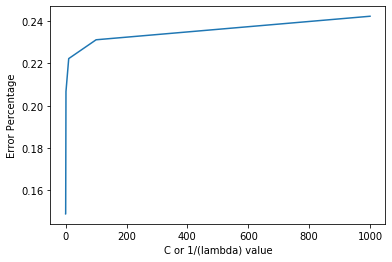

In [48]:
li_of_c_vals = [0.0001,0.001,0.01,0.1,1,10,100,1000]
li_of_errors=[]
for i in li_of_c_vals:
    model = LogisticRegression(C=i, penalty='l2')
    model.fit(x_1,y_1)
    w = model.coef_
    err_val = 1-model.score(x_test,y_test);
    print("C = ",i,", No.of non zero vals: ",np.count_nonzero(w))
    print("Score: ",(1-err_val)*100)
    print("Error: ",(err_val)*100)
    li_of_errors.append(err_val)

plt.plot(li_of_c_vals,li_of_errors)
plt.xlabel('C or 1/(lambda) value')
plt.ylabel('Error Percentage')
plt.show()